In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [30]:
pd.set_option("float_format", "{:.3f}".format)

In [31]:
df = pd.read_csv('C:/Users/Sanjay Bharadwaj U/Desktop/AIML/Mini project - income classification/income_evaluation/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [33]:
print("Check the data. Some values are missing.") if df.isnull().any().any() else print("There are no missing values in the data")

There are no missing values in the data


In [34]:
print("Check the data. Some values are NA") if df.isna().any().any() else print("There are no NAs in the data.")

There are no NAs in the data.


In [35]:
df.workclass.value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [36]:
shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(" ?", np.NaN, inplace = True)
df = df.dropna().reset_index().drop(columns = ["index"])
shape1 = df.shape[0]
print(str(shape0 - shape1) + " rows have been removed")

2399 rows have been removed


In [37]:
df.workclass.value_counts()

workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

In [38]:
income = df.income.value_counts()
income.head()

income
 <=50K    22654
 >50K      7508
Name: count, dtype: int64

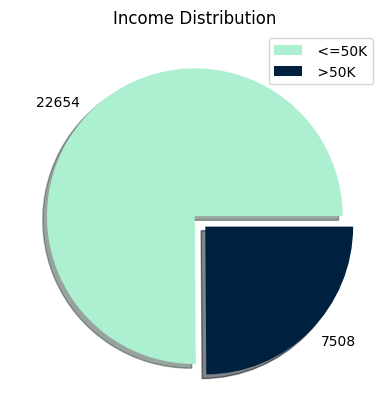

In [39]:
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels = income.values, colors = colors, explode = explode, shadow = True)
plt.title("Income Distribution")
plt.legend(labels = income.index)

In [40]:
df["income"].replace([" <=50K", " >50K"], [1, 0], inplace = True)

In [41]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [42]:
stats = df.select_dtypes(["float", "int64"]).drop(columns = ["income"])

<Axes: >

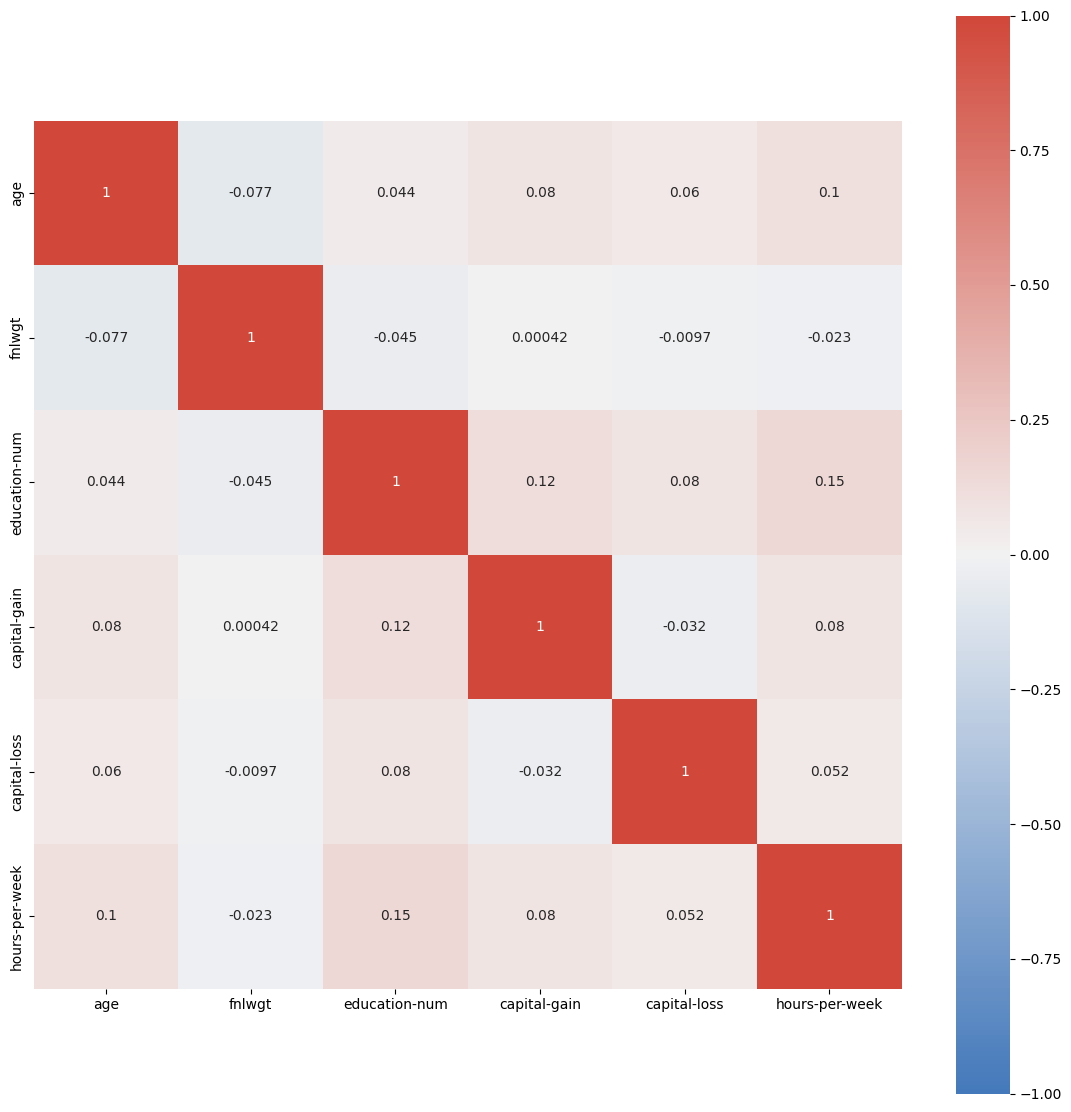

In [43]:
fig = plt.figure(figsize = (14, 14))
corr = stats.corr()
sns.heatmap(corr,
           vmin = -1,
           vmax = 1,
           center = 0,
           cmap = sns.diverging_palette(h_neg = 250, h_pos = 15, as_cmap = True),
           square = True, annot = True)

In [44]:
stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30162.000,38.438,13.135,17.000,28.000,37.000,47.000,90.000
fnlwgt,30162.000,189793.834,105652.972,13769.000,117627.250,178425.000,237628.500,1484705.000
education-num,30162.000,10.121,2.550,1.000,9.000,10.000,13.000,16.000
capital-gain,30162.000,1092.008,7406.346,0.000,0.000,0.000,0.000,99999.000
capital-loss,30162.000,88.372,404.298,0.000,0.000,0.000,0.000,4356.000
hours-per-week,30162.000,40.931,11.980,1.000,40.000,40.000,45.000,99.000


C:\Users\Sanjay Bharadwaj U\AppData\Local\Temp\ipykernel_15888\3303002059.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stats.iloc[:, i], shade = True, color = colors[i * 2 + 1], ax = ax[i, 0]).set(ylabel="",xlabel = stats.columns[i])
C:\Users\Sanjay Bharadwaj U\AppData\Local\Temp\ipykernel_15888\3303002059.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stats.iloc[:, i], shade = True, color = colors[i * 2 + 1], ax = ax[i, 0]).set(ylabel="",xlabel = stats.columns[i])
C:\Users\Sanjay Bharadwaj U\AppData\Local\Temp\ipykernel_15888\3303002059.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stats.iloc[:, i], sh

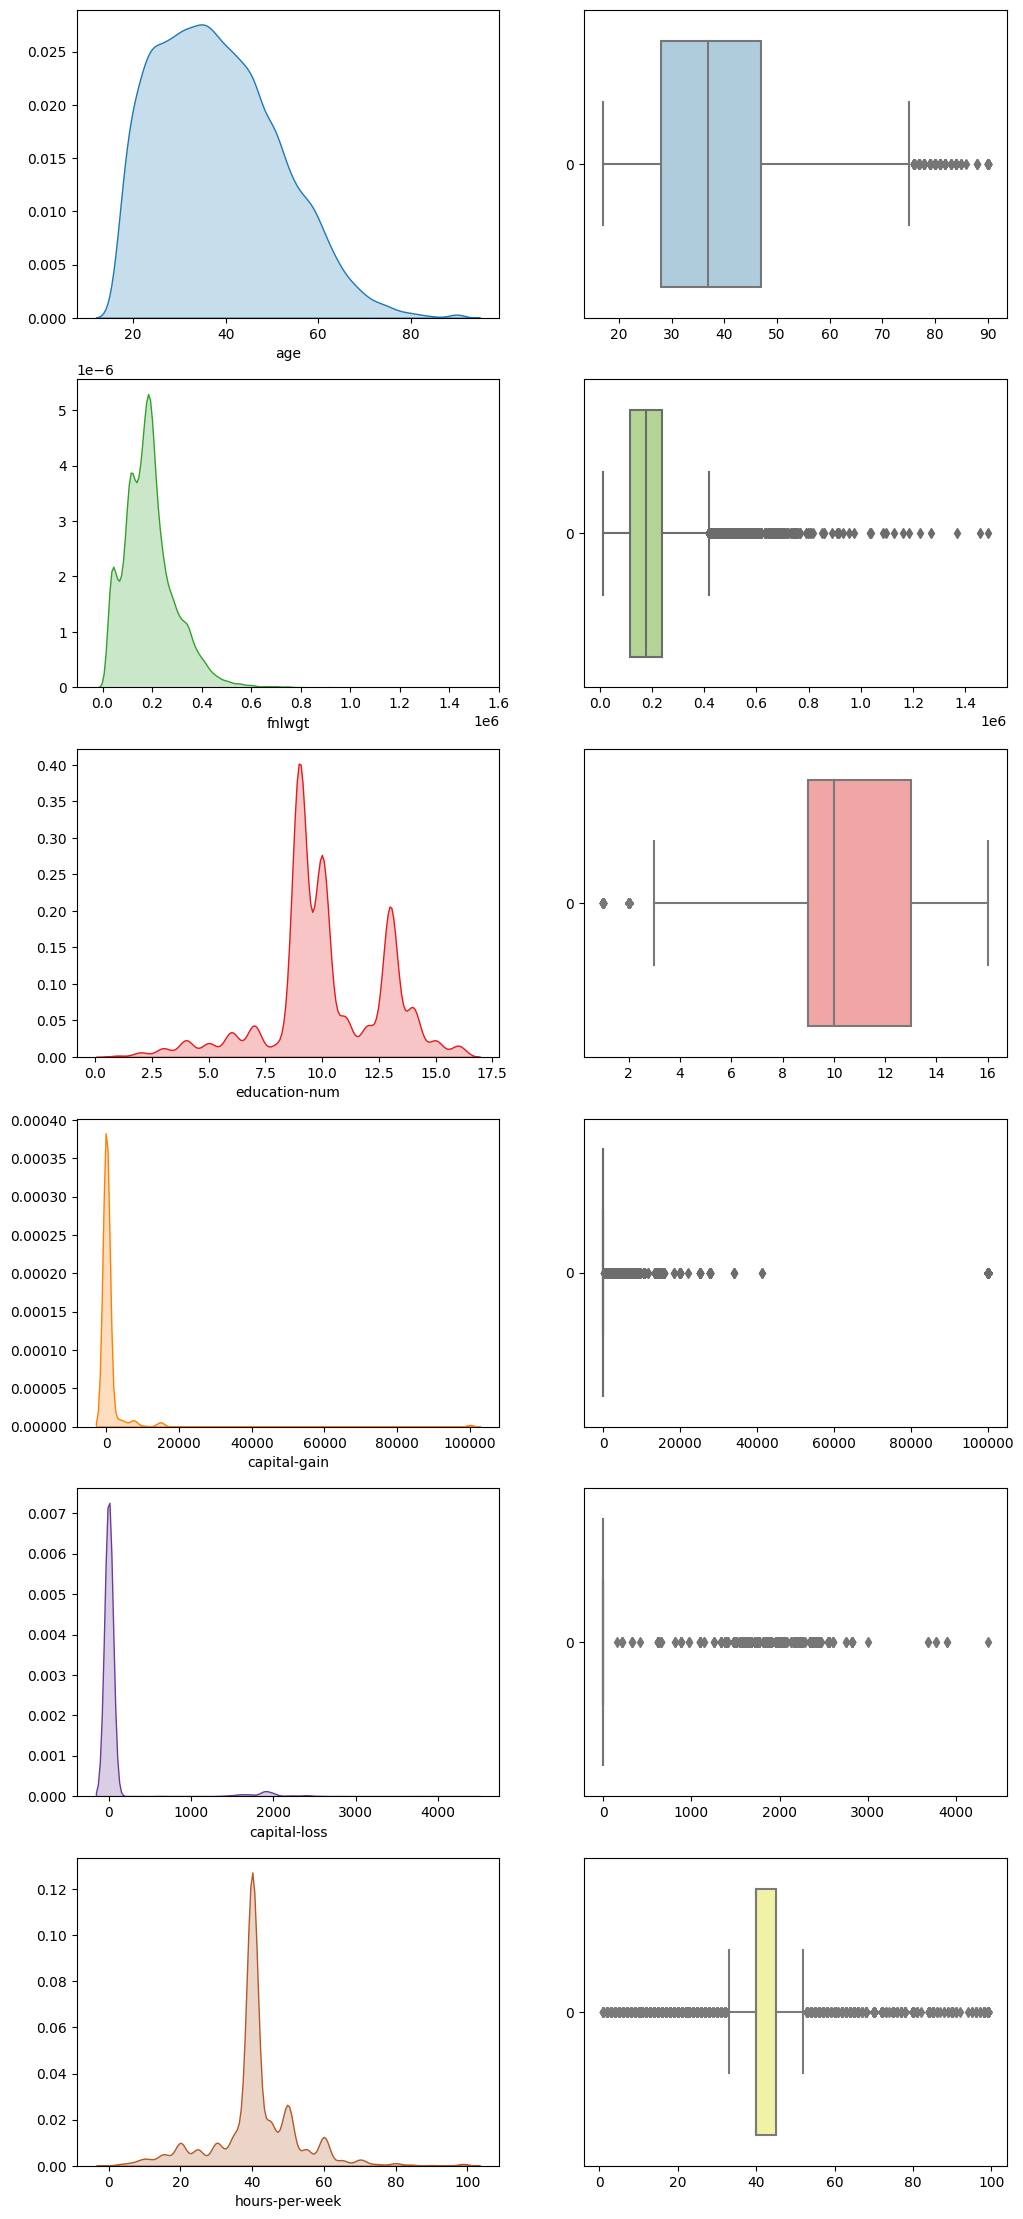

In [45]:
# Creating Graphs
colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize = (12, 28))

for i in range(6):
    sns.kdeplot(stats.iloc[:, i], shade = True, color = colors[i * 2 + 1], ax = ax[i, 0]).set(ylabel="",xlabel = stats.columns[i])
    sns.boxplot(data = stats.iloc[:, i], color = colors[i*2], orient = "h", ax = ax[i, 1]).set(xlabel = "", ylabel ="")
    
plt.show()

In [46]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [47]:
X = df_final.drop(columns = ["income"])
y = df_final["income"]

In [48]:
print(X.shape, y.shape)

(30162, 104) (30162,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21113, 104) (9049, 104) (21113,) (9049,)


In [51]:
# creating scaler and new standardized train and test data frames.
scaler = MinMaxScaler()

X_train_numeral = scaler.fit_transform(X_train.select_dtypes(['float', 'int64']))
X_train_s = pd.concat([pd.DataFrame(X_train_numeral, index=X_train.index, columns=X_train.columns[:6]), 
                       X_train.iloc[:, 6:]], axis=1)

X_test_numeral = scaler.transform(X_test.select_dtypes(['float', 'int64']))
X_test_s = pd.concat([pd.DataFrame(X_test_numeral, index=X_test.index, columns=X_test.columns[:6]),
                      X_test.iloc[:, 6:]], axis=1)

In [52]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
27363,21,199419,10,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
30152,32,34066,6,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
20799,49,43206,15,0,0,55,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
14394,28,114053,10,0,0,30,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
290,36,205607,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [53]:
# function responsible for fitting and predicting algorithms given through lists.
def algorithm_score_list(show_processing=False, standardized=False):
    scores_list = []

    for algorithm in algorithms:
        if show_processing:
            print('processing ' + str(algorithm) + ' algorithm...')

        if standardized:
            X_tn = X_train_s
            X_tt = X_test_s
        else:
            X_tn = X_train
            X_tt = X_test
            
        A = algorithm.fit(X_tn, y_train)
        y_predict = A.predict(X_tt)
        accuracy = accuracy_score(y_test,y_predict)

        scores_list.append([A, accuracy, standardized])
        
    print('all predictions finished')
    return scores_list

In [54]:
algorithms = [
    DecisionTreeClassifier(),
    LogisticRegression(solver = "liblinear"),
    KNeighborsClassifier()
]

In [55]:
default_alg = algorithm_score_list()

all predictions finished


In [56]:
default_alg_s = algorithm_score_list(standardized = True)

all predictions finished


In [57]:
df_alg = pd.DataFrame(default_alg, columns=['algorithm', 'accuracy', 'standardized'])
df_alg = pd.concat([df_alg, 
                    pd.DataFrame(default_alg_s, columns=['algorithm', 'accuracy', 'standardized'])], 
                   axis=0, 
                   ignore_index=True)
df_alg.sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
4,LogisticRegression(solver='liblinear'),0.847,True
5,KNeighborsClassifier(),0.822,True
0,DecisionTreeClassifier(),0.809,False
3,DecisionTreeClassifier(),0.809,True
1,LogisticRegression(solver='liblinear'),0.792,False
2,KNeighborsClassifier(),0.765,False


Tuning DecisionTree

In [58]:
depth = default_alg[0][0].get_depth()

algorithms = []

for i in range(1, depth + 1):
    algorithms.append(DecisionTreeClassifier(max_depth = i))
score_list = algorithm_score_list()

all predictions finished


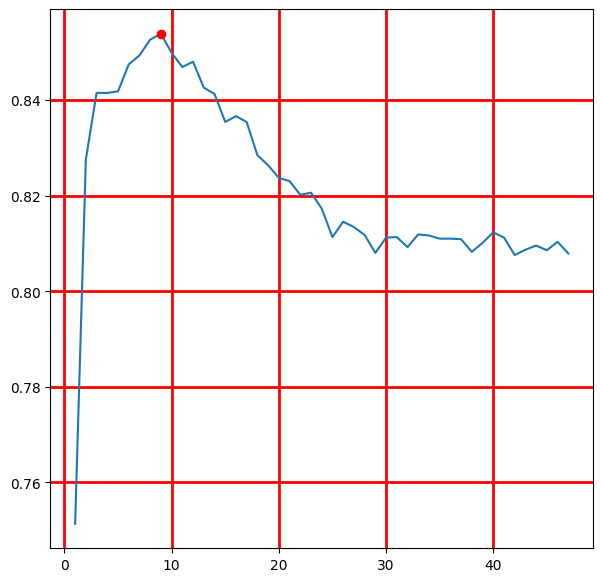

In [59]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize = (7, 7))
plt.grid(color='r', linestyle='-', linewidth=2)
sns.lineplot(x = range(1, depth + 1), y = scores)
plt.plot(scores.index(max(scores)) + 1, max(scores), "or")

In [60]:
print("The best algorithm: DecisionTreeClassifier(max_depth = {}), its accuracy: {}".format(scores.index(max(scores)) +1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth = 9), its accuracy: 0.854


In [61]:
default_alg[0][0].get_params()["min_samples_leaf"]

1

In [62]:
algorithms = []
for i in range(1, 202, 5):
    algorithms.append(DecisionTreeClassifier(min_samples_leaf = i))
score_list = algorithm_score_list()

all predictions finished


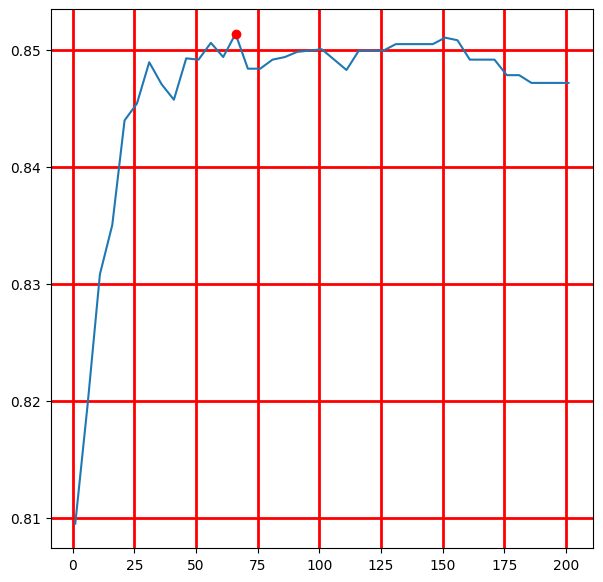

In [63]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize = (7, 7))
plt.grid(color='r', linestyle='-', linewidth=2)
sns.lineplot(x = range(1, 202, 5), y = scores)
plt.plot(scores.index(max(scores)) * 5 + 1, max(scores), "or")

In [64]:
print("The best algorithm: DecisionTreeClassifier(min_samples_leaf = {}), its accuracy: {}".format(scores.index(max(scores)) * 5 + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(min_samples_leaf = 66), its accuracy: 0.851


In [65]:
algorithms = []
for i in range(4, 30, 3):
    for j in range(45, 86, 5):
        algorithms.append(DecisionTreeClassifier(max_depth = i, min_samples_leaf = j))
score_list = algorithm_score_list()


all predictions finished


In [66]:
max_depth = list(map(lambda a: a[0].get_params()['max_depth'], score_list))
min_samples_leaf = list(map(lambda a: a[0].get_params()['min_samples_leaf'], score_list))
scores = list(map(lambda a: a[1], score_list))

df = pd.DataFrame(np.array([max_depth, min_samples_leaf, scores]).T, 
                  columns=['max_depth', 'min_s_l', 'scores'])

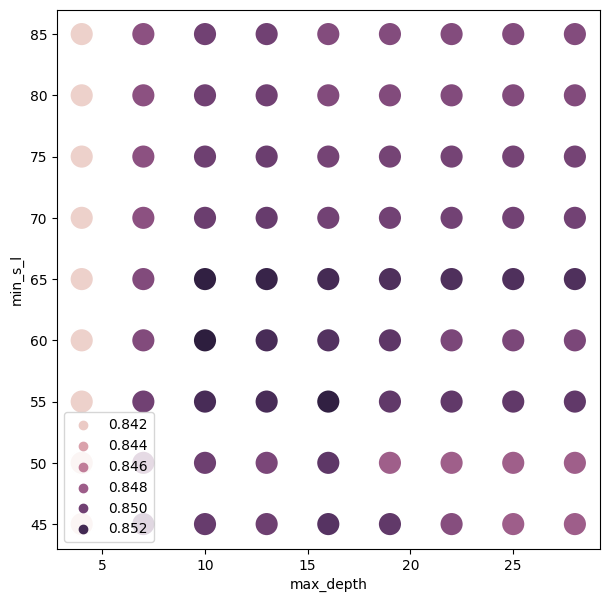

In [67]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=df['max_depth'], y=df['min_s_l'], hue=df['scores'], s=300)
plt.legend(loc='lower left')

In [68]:
best = scores.index(max(scores))
m_d = max_depth[best]
m_s_l = min_samples_leaf[best]
print("The best algorithm: DecisionTreeClassifier(max_depth = {}, min_samples_leaf = {}), its accuracy: {}".format(m_d, m_s_l, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 60), its accuracy: 0.853


In [69]:
algorithms = [DecisionTreeClassifier(criterion = "gini"), DecisionTreeClassifier(criterion = "entropy")]
score_list = algorithm_score_list()
print("Criterion: gini, score: {}".format(str(round(score_list[0][1], 3))))
print("criterion: gini, score: {}".format(str(round(score_list[1][1], 3))))

all predictions finished
Criterion: gini, score: 0.809
criterion: gini, score: 0.814


In [70]:
algorithms = [
    DecisionTreeClassifier(criterion = "gini", max_depth = 9),
    DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 66),
    DecisionTreeClassifier(criterion = "gini", max_depth = 16, min_samples_leaf = 65)
]
df_DT = pd.DataFrame(algorithm_score_list(), columns = ["algorithm", "accuracy", "standardized"])
df_DT

all predictions finished


,algorithm,accuracy,standardized
0,DecisionTreeClassifier(max_depth=9),0.854,False
1,DecisionTreeClassifier(min_samples_leaf=66),0.851,False
2,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.852,False


In [71]:
algorithms = []
for p in ['l1', 'l2']:
    algorithms.append(LogisticRegression(solver='liblinear', penalty=p))
    
df_LR_penalty = pd.DataFrame(algorithm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])
df_LR_penalty

all predictions finished


,algorithm,accuracy,standardized
0,"LogisticRegression(penalty='l1', solver='libli...",0.849,True
1,LogisticRegression(solver='liblinear'),0.847,True


In [72]:
algorithms = []

for c in [100, 10, 1.0, 0.1, 0.01]:
    algorithms.append(LogisticRegression(solver = "liblinear", penalty = "l1", C = c))

df_LR = pd.DataFrame(algorithm_score_list(standardized = True), columns = ["algorithm", "accuracy", "score"])
df_LR

all predictions finished


,algorithm,accuracy,score
0,"LogisticRegression(C=100, penalty='l1', solver...",0.850,True
1,"LogisticRegression(C=10, penalty='l1', solver=...",0.850,True
2,"LogisticRegression(penalty='l1', solver='libli...",0.849,True
3,"LogisticRegression(C=0.1, penalty='l1', solver...",0.847,True
4,"LogisticRegression(C=0.01, penalty='l1', solve...",0.822,True


In [73]:
algorithms = [
    KNeighborsClassifier(weights = "uniform"),
    KNeighborsClassifier(weights = "distance")
]
df_KN_weights = pd.DataFrame(algorithm_score_list(standardized = True), columns = ["algorithm", "accuracy", "standardized"])
df_KN_weights

all predictions finished


,algorithm,accuracy,standardized
0,KNeighborsClassifier(),0.822,True
1,KNeighborsClassifier(weights='distance'),0.815,True


In [74]:
algorithms = []
for i in range(1, 50, 5):
    algorithms.append(KNeighborsClassifier(n_neighbors = i))
    
df_KN_n_neighbors = pd.DataFrame(algorithm_score_list(standardized = True), columns = ["algorithm", "accuracy", "standardized"])

all predictions finished


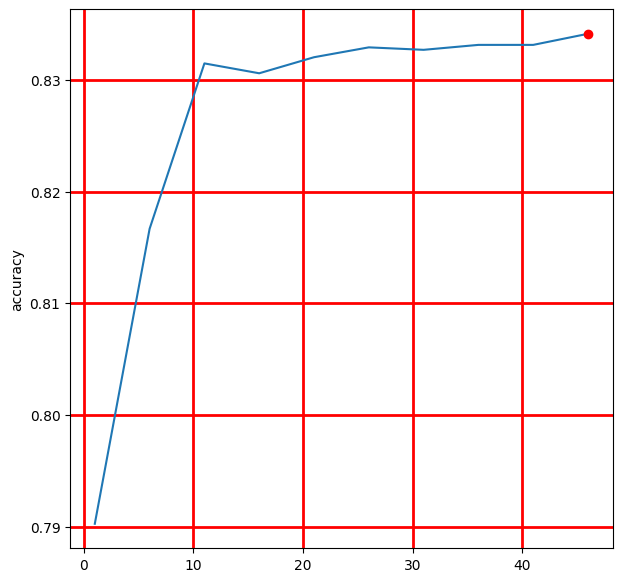

In [75]:
fig = plt.figure(figsize = (7, 7))
plt.grid(color='r', linestyle='-', linewidth=2)
sns.lineplot(x = range(1, 50, 5), y = df_KN_n_neighbors["accuracy"])
plt.plot(df_KN_n_neighbors[df_KN_n_neighbors["accuracy"] == max(df_KN_n_neighbors["accuracy"])].index.values[0] * 5 + 1, max(df_KN_n_neighbors["accuracy"]), "or")

In [76]:
algorithms = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(criterion = "gini", max_depth = 16, min_samples_leaf = 65),
    LogisticRegression(solver = "liblinear"),
    LogisticRegression(C = 10, penalty = "l1", solver = "liblinear"),
    KNeighborsClassifier(),
    KNeighborsClassifier(n_neighbors = 46)
]
final_list = algorithm_score_list()

all predictions finished


In [77]:
algorithms = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(criterion = "gini", max_depth = 16, min_samples_leaf = 65),
    LogisticRegression(solver = "liblinear"),
    LogisticRegression(C = 10, penalty = "l1", solver = "liblinear"),
    KNeighborsClassifier(),
    KNeighborsClassifier(n_neighbors = 46)
]
final_list += algorithm_score_list(standardized = True)

all predictions finished


In [78]:
final_df = pd.DataFrame(final_list, columns=['algorithm', 'accuracy', 'standardized'])
final_df.head(12).sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
1,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.852,False
7,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.852,True
3,"LogisticRegression(C=10, penalty='l1', solver=...",0.850,False
9,"LogisticRegression(C=10, penalty='l1', solver=...",0.850,True
8,LogisticRegression(solver='liblinear'),0.847,True
11,KNeighborsClassifier(n_neighbors=46),0.834,True
10,KNeighborsClassifier(),0.822,True
0,DecisionTreeClassifier(),0.810,False
6,DecisionTreeClassifier(),0.807,True
2,LogisticRegression(solver='liblinear'),0.792,False
